In [583]:
Ns=12 #only even numbers
N, PBC = 6, False
J, U,V = 1, 40.1,-1.97
Nf = 800

In [599]:
from numpy import zeros, sqrt, linalg, array, ones, exp, eye, copy,sign,real,imag,transpose,log,average, var, conj, math, var,append
import matplotlib.pyplot as plt
from random import randint
from scipy.sparse import lil_matrix
from scipy.optimize import basinhopping, dual_annealing, shgo, direct, brute, differential_evolution, minimize
from scipy.sparse.linalg import eigsh
import time

base, baseQ1, NoS = [], [], 0
base1, base1Q1, NoS1 = [],[],0
base2, base2Q1, NoS2 = [],[],0

for j1 in range(0,Ns):
        base1.append([0]*Ns)
        base1[-1][j1]+=1
        base1Q1.append([j1])
NoS1 = len(base1)

for j1 in range(0,Ns):
    for j2 in range(j1,Ns):
        base2.append([0]*Ns)
        base2[-1][j1]+=1
        base2[-1][j2]+=1
        base2Q1.append([j1,j2])
NoS2 = len(base2)

if N==2:
    for j1 in range(0,Ns):
        for j2 in range(j1,Ns):
            base.append([0]*Ns)
            base[-1][j1]+=1
            base[-1][j2]+=1
            baseQ1.append([j1,j2])
    NoS = len(base)

if N==3:
    for j1 in range(0,Ns):
        for j2 in range(j1,Ns):
            for j3 in range(j2,Ns):
                base.append([0]*Ns)
                base[-1][j1]+=1
                base[-1][j2]+=1
                base[-1][j3]+=1
                baseQ1.append([j1,j2,j3])
    NoS = len(base)

if N==4:
    for j1 in range(0,Ns):
        for j2 in range(j1,Ns):
            for j3 in range(j2,Ns):
                for j4 in range(j3,Ns):
                    base.append([0]*Ns)
                    base[-1][j1]+=1
                    base[-1][j2]+=1
                    base[-1][j3]+=1
                    base[-1][j4]+=1
                    baseQ1.append([j1,j2,j3,j4])
    NoS = len(base)
       
if N==5:
    for j1 in range(0,Ns):
        for j2 in range(j1,Ns):
            for j3 in range(j2,Ns):
                for j4 in range(j3,Ns):
                    for j5 in range(j4,Ns):
                        base.append([0]*Ns)
                        base[-1][j1]+=1
                        base[-1][j2]+=1
                        base[-1][j3]+=1
                        base[-1][j4]+=1
                        base[-1][j5]+=1
                        baseQ1.append([j1,j2,j3,j4,j5])
    NoS = len(base)
    
if N==6:
    for j1 in range(0,Ns):
        for j2 in range(j1,Ns):
            for j3 in range(j2,Ns):
                for j4 in range(j3,Ns):
                    for j5 in range(j4,Ns):
                        for j6 in range(j5,Ns):
                            base.append([0]*Ns)
                            base[-1][j1]+=1
                            base[-1][j2]+=1
                            base[-1][j3]+=1
                            base[-1][j4]+=1
                            base[-1][j5]+=1
                            base[-1][j6]+=1
                            baseQ1.append([j1,j2,j3,j4,j5,j6])
    NoS = len(base)
    
if Nf == "max":
    Nf = NoS
print('Number of base states =',NoS)

Number of base states = 12376


In [607]:
#################################################################
##Compute energy and the GS of H for choosen N ##################
#################################################################

def generateHamitlonian(base_, J_,U_,V_):
    NoS = len(base_)
    H = lil_matrix((NoS,NoS),dtype=float)
    for i in range(NoS):
        sL = base_[i]

        for j in range(0,Ns-1):
            if sL[j]>0:
                coef = -J_*sqrt(sL[j])*sqrt(sL[j+1]+1)
                sR = [x for x in sL]
                sR[j]-=1
                sR[j+1]+=1
                ip = base_.index(sR)
                H[i,ip]+=coef
                H[ip,i]+=coef
        if PBC:     
            if sL[Ns-1]>0:
                coef = -J_*sqrt(sL[Ns-1])*sqrt(sL[0]+1)
                sR = [x for x in sL]
                sR[Ns-1]-=1
                sR[0]+=1
                ip = base_.index(sR)
                H[i,ip]+=coef
                H[ip,i]+=coef

        coefU = 0.0
        for j in range(0,Ns):
            coefU += 0.5*U_*sL[j]*(sL[j]-1)
        H[i,i] += coefU

        coefV = 0.0
        for j in range(0,Ns-1):
            coefV += V_*sL[j]*sL[j+1]
        if PBC:  
            coefV += V_*sL[Ns-1]*sL[0]
        H[i,i] += coefV
    return H

print("Computing reference GS...",end='')
t0 = time.time()

H_1atom = generateHamitlonian(base1, J,U,V)
E, v = eigsh(H_1atom,k=1,which='SA')  
E_1atom = E[0]
GS_1atom = sign(v[0,0])*v[:,0]

H_2atom = generateHamitlonian(base2, J,U,V)
E, v = eigsh(H_2atom,k=1,which='SA')  
E_2atom = E[0]
GS_2atom = sign(v[0,0])*v[:,0]

#plt.imshow(real(reshapePhiTo2D(GS_2atom)))

H = generateHamitlonian(base, J,U,V)
E, v = eigsh(H,k=1,which='SA')  
E_R = E[0]
GS = sign(v[0,0])*v[:,0]
#print(sum(abs(GS_1atom)**2))

print(" DONE in ",(time.time()-t0)*1000,"[ms]")

Computing reference GS... DONE in  5644.980430603027 [ms]


In [608]:
def secondToFirst(state):
    baseState = state.copy()
    js = [0]*N
    for i in range(N):
        for n in range(Ns):
            if baseState[n]>0:
                js[i]=n
                baseState[n]-=1
                break
    return js

def norm(fock):
    out = math.factorial(N)
    for n in range(Ns):
        out /= math.factorial(fock[n])
    return sqrt(out)

def energy(c):
    return sum(real(conj(c)*H*c))

def getNis(c):
    out = zeros(Ns)
    for i in range(NoS):
        out += abs(c[i])**2*array(base[i])
    return out   

def getG2sX(c,x):
    G2s = zeros(Ns,dtype=complex)
    for i in range(NoS):
        fock = base[i]
        for xp in range(Ns):
            G2s[xp] += abs(c[i])**2*fock[x]*fock[xp]
            if x==xp:
                G2s[xp] -= abs(c[i])**2*fock[x]
    return G2s  

In [609]:
def firstToSecond(js):
    out = zeros(Ns,dtype=int)
    for j in js:
        out[j]+=1
    return out

def P1(js):
    out = zeros(int(Ns*(Ns+1)/2),dtype=int)
    for n in range(N):
        for np in range(n+1,N):
            out[combs.index([js[n],js[np]])]+=1
    return out

def Ph1(js):
    out = zeros(len(combsh),dtype=int)
    for n in range(N):
        for np in range(n+1,N):
            ind1 = js[n]
            ind2 = js[np]
            if js[n]+js[np] >= Ns:
                ind1 -= (js[n]+js[np]-Ns+1)
                ind2 -= (js[n]+js[np]-Ns+1)    
            out[combsh.index([ind1,ind2])]+=1
    return out

def P(fockState):
    js = secondToFirst(fockState)
    out = zeros(int(Ns*(Ns+1)/2),dtype=int)
    for n in range(N):
        for np in range(n+1,N):
            out[combs.index([js[n],js[np]])]+=1
    return out

def Ph(fockState):
    js = secondToFirst(fockState)
    out = zeros(len(combsh),dtype=int)
    for n in range(N):
        for np in range(n+1,N):
            ind1 = js[n]
            ind2 = js[np]
            if js[n]+js[np] >= Ns:
                ind1 -= (js[n]+js[np]-Ns+1)
                ind2 -= (js[n]+js[np]-Ns+1)    
            out[combsh.index([ind1,ind2])]+=1
    return out


In [610]:
import random

combs = []
for n in range(Ns):
    for n2 in range(n, Ns):
        combs.append([n,n2])
        
combsh = []
for n in range(Ns):
    for n2 in range(n, Ns):
        if n+n2 < Ns:
            combsh.append([n,n2])
print(len(combsh))            
Norms1 = []
for i in range(NoS):
    Norms1.append( norm(base[i]) )
            
Norms1f = []
A1f = zeros([Nf,int((Ns+1)/2)],dtype=int)
A2hf = zeros([Nf,len(combsh)],dtype=int)
GS_Rf = zeros(Nf)

jss = []
for i in range(Nf):
    js = []
    js.append(combsh[i%len(combsh)][0])
    js.append(combsh[i%len(combsh)][1])
    for ip in range(2,N):
        js.append(random.randint(0,Ns-1))
    js.sort()
    
    while js in jss:
        js = []
        js.append(combsh[i%len(combsh)][0])
        js.append(combsh[i%len(combsh)][1])
        for ip in range(2,N):
            js.append(random.randint(0,Ns-1))
        js.sort()
    jss.append(js)
    
        
intt = 0
for i in range(len(jss)):
   # print(jss[i])
    js = jss[i]
    fock = firstToSecond(js)
    A1f[i] = array(fock[0:int((Ns+1)/2)])  + array(fock[Ns:int((Ns-1)/2):-1])
   # A2f[i] = P1(js)
    A2hf[i] = Ph1(js)
    GS_Rf[i] = GS[ baseQ1.index(js) ]
    Norms1f.append( norm(firstToSecond(js)) )
    intt+=1
    
#########################333####################################################################
 
def psi12to14(psi12):
    out = []
    num =0
    for comb in combs:
        if comb[0]+comb[1]< Ns:
            out.append(psi12[num])
        num+=1
    return array(out)

def psi14to12(psi14):
    out = zeros(len(combs))
    num =0
    for combh in combsh:
        ind1 = combh[0]
        ind2 = combh[1]
        out[combs.index([ind1,ind2])] = psi14[num]
        
        ind1 += Ns-1-(combh[0]+combh[1])
        ind2 += Ns-1-(combh[0]+combh[1])
        out[combs.index([ind1,ind2])] = psi14[num]
        num+=1      
    return out
     
##############################################################################################

Norms_2atom = []
for i in range(len(base2)):
    Norms_2atom.append( norm(base2[i]) )



def variance1h( psi ):
    c = normalised(real(array(Norms1)*exp(A1.dot(log(psi,dtype=complex)))))
    return sum((c-GS)**2)

def variance1hf( psi ):
    c = normalised(real(array(Norms1f)*exp(A1f.dot(log(psi,dtype=complex)))))
    return sum((c-GS_Rf)**2)

def findPsi1(method='half'):
    print("Looking for Psi_A1...",end='')
    minimizer_kwargs = {"method": "COBYLA"}
    t0 = time.time()
    psi0h = GS_1atom[0:int((Ns+1)/2)]
    reth = basinhopping(variance1h, psi0h, minimizer_kwargs=minimizer_kwargs, niter=100,niter_success=10)
    psi = append(reth.x, reth.x[::-1])
    print(" DONE in",(time.time()-t0)*1000,"[ms]")
    return psi

def findPsi1f(method='half'):
    print("Looking for Psi_A1f...",end='')
    minimizer_kwargs = {"method": "COBYLA"}
    t0 = time.time()
    psi0h = GS_1atom[0:int((Ns+1)/2)]
    reth = basinhopping(variance1hf, psi0h, minimizer_kwargs=minimizer_kwargs, niter=100,niter_success=10)
    psi = append(reth.x, reth.x[::-1])
    print(" DONE in",(time.time()-t0)*1000,"[ms]")
    return psi

42


In [611]:
####################################################
## Functions for Ansatz 2 ##########################
####################################################

def normalised(arr):
    return arr / sqrt(sum(abs(arr)**2))

def variance2h( psi ):
    c = normalised(real(array(Norms1)*exp(A2h.dot(log(psi,dtype=complex)))))
    return sum((c-GS)**2)

def variance2hf( psi ):
    c = normalised(real(array(Norms1f)*exp(A2hf.dot(log(psi,dtype=complex)))))
    return sum((c-GS_Rf)**2)

def findPsi2():
    print("Looking for Psi_A2...",end='')
    t0 = time.time()
    psi0 = GS_2atom
    ret = minimize(variance2, psi0, method='Powell', tol=1e-12, bounds=[(1e-12,1)]*len(psi0))
    print(" DONE in",(time.time()-t0)*1000,"[ms]")
    return ret.x

def findPsi2f():
    print("Looking for Psi_A2f...",end='')
    t0 = time.time()
    psi0 = GS_2atom
    ret = minimize(variance2f, psi0, method='Powell', tol=1e-12, bounds=[(1e-12,1)]*len(psi0))
    print(" DONE in",(time.time()-t0)*1000,"[ms]")
    return ret.x

def findPsi2h():
    print("Looking for Psi_A2...",end='')
    t0 = time.time()
    psi0 = psi12to14(GS_2atom)
    ret = minimize(variance2h, psi0, method='Powell', tol=1e-18, bounds=[(1e-12,1)]*len(psi0))
    print(" DONE in",(time.time()-t0)*1000,"[ms]")
    return psi14to12(ret.x)

def findPsi2hf():
    print("Looking for Psi_A2f...",end='')
    t0 = time.time()
    psi0 = psi12to14(GS_2atom)
    ret = minimize(variance2hf, psi0, method='Powell', tol=1e-18, bounds=[(1e-12,1)]*len(psi0))
    print(" DONE in",(time.time()-t0)*1000,"[ms]")
    return psi14to12(ret.x)

def reshapePhiTo2D(phi1D):
    out = zeros([Ns,Ns],dtype=complex)
    num=0
    for n in range(Ns):
        out[n][n] = phi1D[num]
        num+=1
        for n2 in range(n+1, Ns):
            out[n][n2] = phi1D[num]
            out[n2][n] = phi1D[num]
            num+=1
    return out


In [612]:
A1 = zeros([NoS,int((Ns+1)/2)],dtype=int)

for i in range(NoS):
    A1[i] = array(base[i][0:int((Ns+1)/2)])  + array(base[i][Ns:int((Ns-1)/2):-1])

A2 = zeros([NoS,len(combs)],dtype=int)
A2h = zeros([NoS,len(combsh)],dtype=int)


for i in range(NoS):
    A2[i] = P(base[i])
    A2h[i] = Ph(base[i])


####################################################
## Compute best Ansatz functions ###################
####################################################
psiA1f = findPsi1f()
phiA21Df = findPsi2hf()

phiA2f = reshapePhiTo2D(phiA21Df)

Looking for Psi_A1f... DONE in 305.67312240600586 [ms]
Looking for Psi_A2f... DONE in 7483.299255371094 [ms]


In [575]:
psiA1 = findPsi1()
phiA21D = findPsi2h()


phiA2 = reshapePhiTo2D(phiA21D)

Looking for Psi_A1... DONE in 5616.4915561676025 [ms]
Looking for Psi_A2... DONE in 105296.46563529968 [ms]


(E_GS-E_free)/(|N E_free|) =  -0.021658853197640625
(E_A1-E_free)/(|N E_free|) =  4.662917633404581 	(E_A1f-E_free)/(|N E_free|) =  4.986515070325768
(E_A2-E_free)/(|N E_free|) =  -0.011992060958224495 	(E_A2f-E_free)/(|N E_free|) =  -0.00540510558472508
(E_J-E_free)/(|N E_free|) =  0.36926944295450936

|<ED|A1>|^2 =  0.17191386713189405 	|<ED|A1f>|^2 =  0.16451863788747212
|<ED|A2>|^2 =  0.9968772747741852 	|<ED|A2f>|^2 =  0.982782210650479
|<ED|J>|^2 =  0.23954444468684621


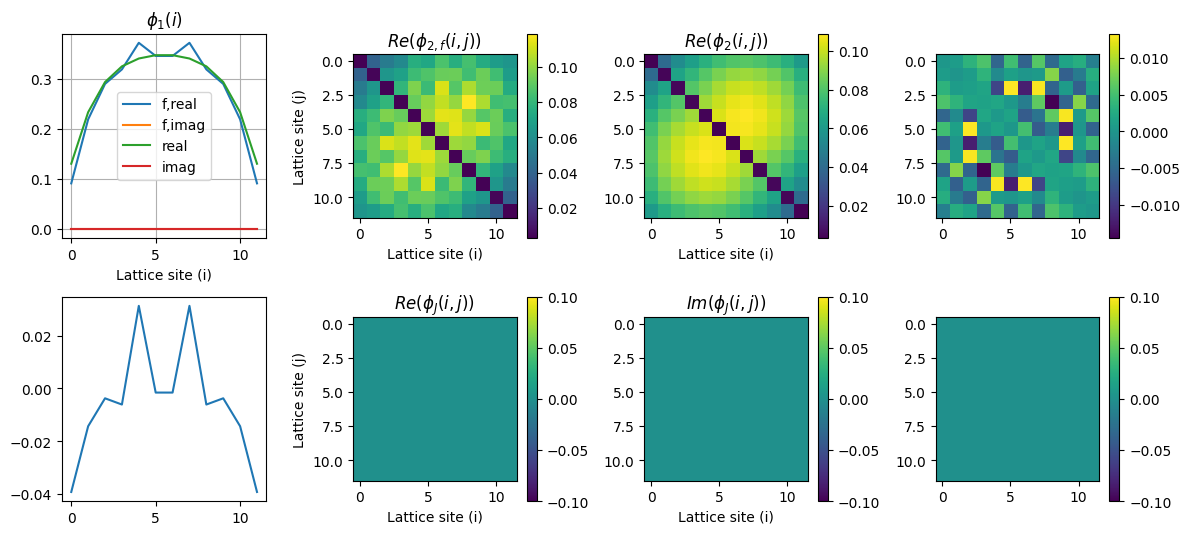

In [618]:
####################################################
## Plot Ansatz functions ###########################
####################################################

import numpy as np
psiA1f /= sqrt(sum(abs(psiA1f)**2))

phiA21Df /= sqrt(sum(sum(abs(phiA2f)**2)))
phiA2f /= sqrt(sum(sum(abs(phiA2f)**2)))

psiA1 /= sqrt(sum(abs(psiA1)**2))

phiA21D /= sqrt(sum(sum(abs(phiA2)**2)))
phiA2 /= sqrt(sum(sum(abs(phiA2)**2)))


c1 = normalised( real(array(Norms1)*exp(A1.dot(log(psiA1[0:int(Ns/2)],dtype=complex)))) )
c2 = normalised( real(array(Norms1)*exp(A2.dot(log(phiA21D,dtype=complex)))) )
cJ = normalised( real(array(Norms1)*exp(A2.dot(log(GS_2atom,dtype=complex)))) )


c1f = normalised( real(array(Norms1)*exp(A1.dot(log(psiA1f[0:int(Ns/2)],dtype=complex)))) )
c2f = normalised( real(array(Norms1)*exp(A2.dot(log(phiA21Df,dtype=complex)))) )

EAnsatz1 = energy(c1)
EAnsatz2 = energy(c2)
EAnsatz1f = energy(c1f)
EAnsatz2f = energy(c2f)
EJ = energy(cJ)

print('(E_GS-E_free)/(|N E_free|) = ', (E_R-N*E_1atom)/(abs(N*E_1atom)) )
print('(E_A1-E_free)/(|N E_free|) = ',  (EAnsatz1-N*E_1atom)/(abs(N*E_1atom)),'\t(E_A1f-E_free)/(|N E_free|) = ',  (EAnsatz1f-N*E_1atom)/(abs(N*E_1atom)) )
print('(E_A2-E_free)/(|N E_free|) = ',  (EAnsatz2-N*E_1atom)/(abs(N*E_1atom)),'\t(E_A2f-E_free)/(|N E_free|) = ',  (EAnsatz2f-N*E_1atom)/(abs(N*E_1atom)) )
print('(E_J-E_free)/(|N E_free|) = ',  (EJ-N*E_1atom)/(abs(N*E_1atom)) )
print()
print('|<ED|A1>|^2 = ',(abs(c1.dot(GS))**2),'\t|<ED|A1f>|^2 = ',(abs(c1f.dot(GS))**2))
print('|<ED|A2>|^2 = ',(abs(c2.dot(GS))**2),'\t|<ED|A2f>|^2 = ',(abs(c2f.dot(GS))**2))

# print('|<ED|A1f>|^2 = ',(abs(c1f.dot(GS))**2))
# print('|<ED|A2f>|^2 = ',1-0.5*variance2hf(psi12to14(phiA21Df)))
print('|<ED|J>|^2 = ',(abs(cJ.dot(GS))**2))


fig, ax = plt.subplots(2,4,figsize=(12,5.5))
ax[0,0].plot(real(psiA1f),label='f,real')
ax[0,0].plot(imag(psiA1f),label='f,imag')
ax[0,0].plot(real(psiA1),label='real')
ax[0,0].plot(imag(psiA1),label='imag')

ax[1,0].plot(real(psiA1f)-real(psiA1))
#ax[0,0].plot(GS_1atom,'--',label = '$GS_{free}$')

cmap = ax[0,1].imshow(real(phiA2f))
cbar = plt.colorbar(cmap)
cmap = ax[0,2].imshow(real(phiA2))
cbar = plt.colorbar(cmap)
cmap = ax[0,3].imshow(real(phiA2)-real(phiA2f))
cbar = plt.colorbar(cmap)

cmap = ax[1,1].imshow(imag(phiA2f))
cbar = plt.colorbar(cmap)
cmap = ax[1,2].imshow(imag(phiA2))
cbar = plt.colorbar(cmap)
cmap = ax[1,3].imshow(imag(phiA2)-imag(phiA2f))
cbar = plt.colorbar(cmap)




ax[0,0].grid()
ax[0,0].legend()
ax[0,0].set_xlabel('Lattice site (i)')
ax[0,1].set_xlabel('Lattice site (i)')
ax[0,1].set_ylabel('Lattice site (j)')
ax[0,2].set_xlabel('Lattice site (i)')
#ax[0,2].set_ylabel('Lattice site (j)')

ax[0,0].set_title('$\phi_1(i)$')
ax[0,1].set_title('$Re(\phi_{2,f}(i,j))$')
ax[0,2].set_title('$Re(\phi_2(i,j))$')

ax[1,1].set_xlabel('Lattice site (i)')
ax[1,1].set_ylabel('Lattice site (j)')
ax[1,2].set_xlabel('Lattice site (i)')
#ax[1,2].set_ylabel('Lattice site (j)')

ax[1,1].set_title('$Re(\phi_J(i,j))$')
ax[1,2].set_title('$Im(\phi_J(i,j))$')
plt.tight_layout()
#plt.savefig("40_-1.97_N3_Ns30.func.png")
plt.show()